In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import io
%cd "C:\Users\anupz\Desktop\simplilearn\data science with python\datafiles\simplilearn projects\1577429980_walmart_store_sales"

C:\Users\anupz\Desktop\simplilearn\data science with python\datafiles\simplilearn projects\1577429980_walmart_store_sales


In [3]:
walmart = pd.read_csv('Walmart_Store_sales.csv')

In [4]:
walmart.shape

(6435, 8)

In [5]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# Check for missing values

In [7]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
# There are no missing values

In [9]:
# Date is in object data type. We should change it to datetime format
walmart.Date = pd.to_datetime(walmart.Date,dayfirst=True)

In [10]:
# to remove the scientific notation of large numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
# Extract the month and year from date
walmart['Month'] = walmart.Date.dt.month
walmart['Year'] = walmart.Date.dt.year

In [12]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,3,2010


In [13]:
# Analysis task- 
#Which store has maximum sales

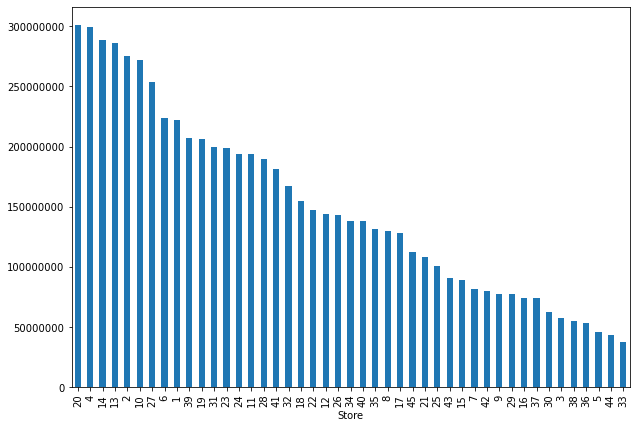

In [14]:
plt.figure(figsize=(10,7))
walmart.Weekly_Sales.groupby(walmart.Store).sum().sort_values(ascending=False).plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')

In [15]:
# from the above graph we can see that Store number 20 has the maximum sales

In [16]:
#Which store has maximum standard deviation i.e., the sales vary a lot. 
#Also, find out the coefficient of mean to standard deviation

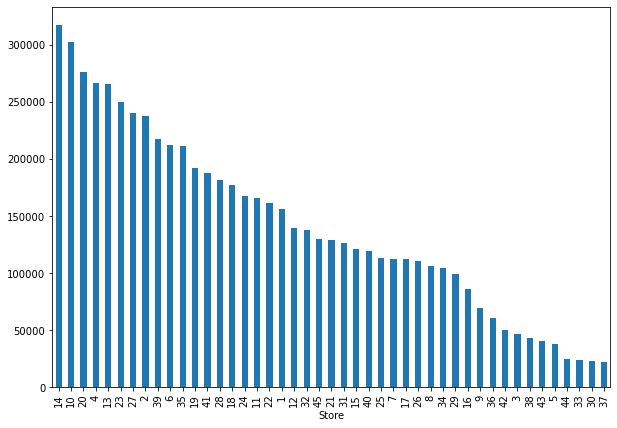

In [17]:
plt.figure(figsize=(10,7))
walmart.Weekly_Sales.groupby(walmart.Store).std().sort_values(ascending=False).plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')

In [18]:
# Store number 14 has the maximum standard deviation

In [19]:
# for coefficient of mean to std dev

In [20]:
store14 = walmart[walmart.Store==14].Weekly_Sales

In [21]:
coeff = store14.std()/store14.mean()*100
coeff

15.713673600948338

In [22]:
#Which store/s has good quarterly growth rate in Q3’2012

In [23]:
Q2_2012 = walmart[(walmart.Year == 2012) & (walmart.Month <7) & (walmart.Month>3 )]

In [24]:
Q2_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
113,1,2012-04-06,1899676.88,0,70.43,3.89,221.44,7.14,4,2012
114,1,2012-04-13,1621031.70,0,69.07,3.89,221.51,7.14,4,2012
115,1,2012-04-20,1521577.87,0,66.76,3.88,221.56,7.14,4,2012
116,1,2012-04-27,1468928.37,0,67.23,3.81,221.62,7.14,4,2012
117,1,2012-05-04,1684519.99,0,75.55,3.75,221.67,7.14,5,2012


In [25]:
Q3_2012 = walmart[(walmart.Year == 2012) & (walmart.Month <10) & (walmart.Month>6 )]

In [26]:
Q3_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
126,1,2012-07-06,1769854.16,0,81.57,3.23,221.88,6.91,7,2012
127,1,2012-07-13,1527014.04,0,77.12,3.26,221.92,6.91,7,2012
128,1,2012-07-20,1497954.76,0,80.42,3.31,221.93,6.91,7,2012
129,1,2012-07-27,1439123.71,0,82.66,3.41,221.94,6.91,7,2012
130,1,2012-08-03,1631135.79,0,86.11,3.42,221.95,6.91,8,2012


In [27]:
Q2_2012.shape

(585, 10)

In [28]:
Q2 = Q2_2012.Weekly_Sales.groupby(Q2_2012.Store).sum()

In [29]:
Q2.head()

Store
1   20978760.12
2   25083604.88
3    5620316.49
4   28454363.67
5    4466363.69
Name: Weekly_Sales, dtype: float64

In [30]:
Q3 = Q3_2012.Weekly_Sales.groupby(Q3_2012.Store).sum()
Q3.head()

Store
1   20253947.78
2   24303354.86
3    5298005.47
4   27796792.46
5    4163790.99
Name: Weekly_Sales, dtype: float64

In [31]:
growth_rate = (Q3-Q2)/Q2

<AxesSubplot:xlabel='Store'>

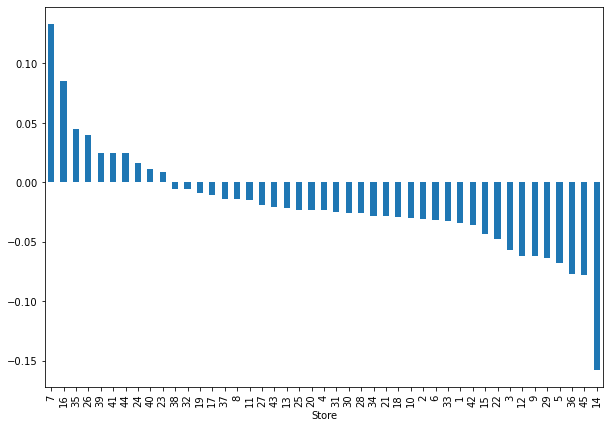

In [32]:
plt.figure(figsize=(10,7))
growth_rate.sort_values(ascending=False).plot(kind='bar')

In [33]:
# Store number 7 has better growth rate than the other stores

In [34]:
#Some holidays have a negative impact on sales. Find out holidays which 
#have higher sales than the mean sales in non-holiday season for all stores together

In [35]:
# mean sales in non-holiday season for all stores together

In [36]:
non_holiday_mean = walmart[walmart.Holiday_Flag==0].Weekly_Sales.mean()
round(non_holiday_mean,2)

1041256.38

In [37]:
# Holidays which have higher sales than the non holiday mean

In [38]:
holidays_higher_sales = walmart[(walmart.Holiday_Flag==1) & (walmart.Weekly_Sales> non_holiday_mean)]

In [39]:
holidays_higher_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2,2010
31,1,2010-09-10,1507460.69,1,78.69,2.56,211.50,7.79,9,2010
42,1,2010-11-26,1955624.11,1,64.52,2.73,211.75,7.84,11,2010
47,1,2010-12-31,1367320.01,1,48.43,2.94,211.40,7.84,12,2010
53,1,2011-02-11,1649614.93,1,36.39,3.02,212.94,7.74,2,2011


In [40]:
# we can plot a graph to know which holiday has greater sales overall

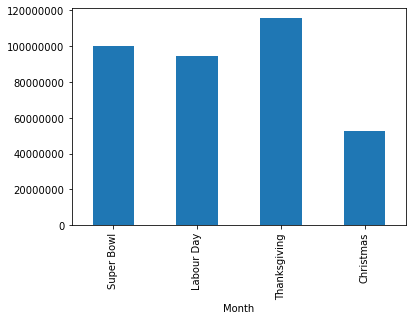

In [41]:
x=[0,1,2,3]
labels=['Super Bowl','Labour Day','Thanksgiving','Christmas']
holidays_higher_sales.Weekly_Sales.groupby(holidays_higher_sales.Month).sum().plot(kind='bar')
plt.xticks(x,labels)
plt.ticklabel_format(style='plain',axis='y')

In [42]:
# In the holidays where the sales are higher than the non holiday mean, Thanksgiving has the most sales

In [43]:
#Provide a monthly and semester view of sales in units and give insight

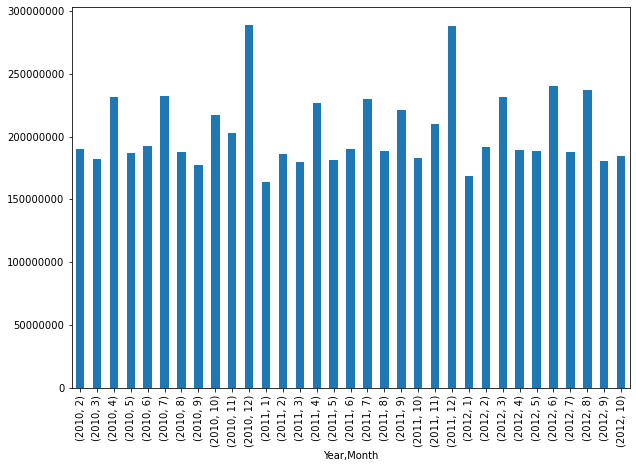

In [44]:
# Monthly view
plt.figure(figsize=(10,7))
walmart.groupby(['Year','Month'])['Weekly_Sales'].sum().plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')

In [45]:
# Semester view of sales

In [46]:
# We need to categorize the data semester wise
walmart['Semester'] = ['sem1' if a < 7 else 'sem2' for a in walmart.Month ]

In [47]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2,2010,sem1
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2,2010,sem1
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2,2010,sem1
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2,2010,sem1
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,3,2010,sem1


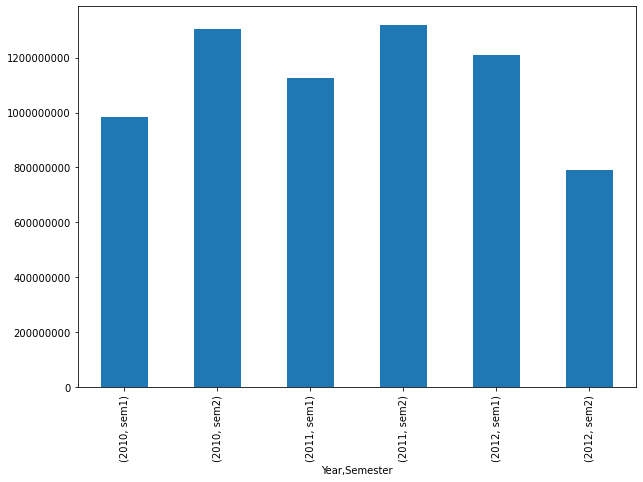

In [48]:
plt.figure(figsize=(10,7))
walmart.groupby(['Year','Semester'])['Weekly_Sales'].sum().plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')

In [49]:
# For Store 1 – Build  prediction models to forecast demand

In [50]:
# Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
#(starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [51]:
store1 = walmart[walmart.Store==1]

In [52]:
store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2,2010,sem1
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2,2010,sem1
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2,2010,sem1
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2,2010,sem1
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,3,2010,sem1


In [53]:
# to restructure the dates as 1,2.... we can use the label encoder
objectcols = store1.Date

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()

In [56]:
objectcols_labeled = le.fit_transform(objectcols)

In [57]:
# convert it in datframe format
objectcols_labeled = pd.DataFrame(objectcols_labeled,columns=['Date'])
objectcols_labeled.head()

,Date
0,0
1,1
2,2
3,3
4,4


In [58]:
# Check for outliers

<AxesSubplot:>

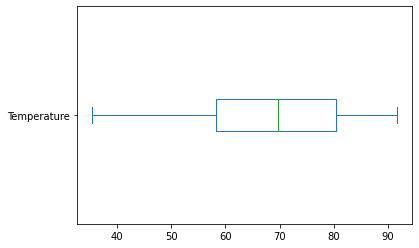

In [59]:
store1.Temperature.plot(kind='box',vert=False)

<AxesSubplot:>

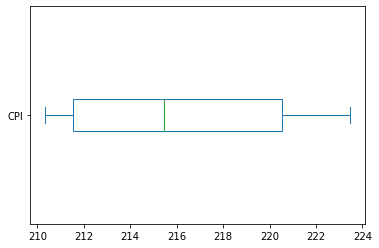

In [60]:
store1.CPI.plot(kind='box',vert=False)

<AxesSubplot:>

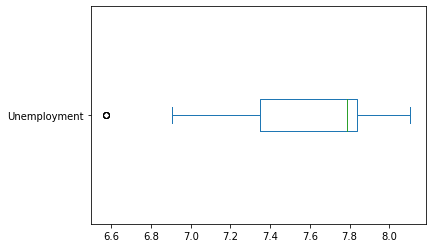

In [61]:
store1.Unemployment.plot(kind='box',vert=False)

<AxesSubplot:>

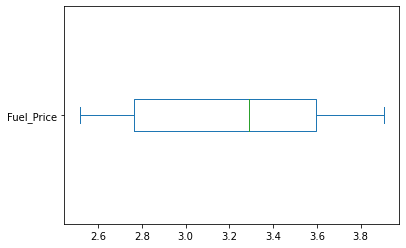

In [62]:
store1.Fuel_Price.plot(kind='box',vert=False)

In [66]:
numericcols = store1[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]

In [67]:
#check for multicollinearity

In [68]:
numericcols.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.00,-0.22,0.12,0.23,-0.10
Temperature,-0.22,1.00,0.23,0.12,-0.18
Fuel_Price,0.12,0.23,1.00,0.76,-0.51
CPI,0.23,0.12,0.76,1.00,-0.81
Unemployment,-0.10,-0.18,-0.51,-0.81,1.00


In [69]:
# No multicollinearity found

In [70]:
store1_clean = pd.concat([numericcols,objectcols_labeled],axis=1)

In [71]:
store1_clean.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1643690.90,42.31,2.57,211.10,8.11,0
1,1641957.44,38.51,2.55,211.24,8.11,1
2,1611968.17,39.93,2.51,211.29,8.11,2
3,1409727.59,46.63,2.56,211.32,8.11,3
4,1554806.68,46.50,2.62,211.35,8.11,4


In [72]:
# Linear regression model

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [74]:
y= store1_clean.Weekly_Sales

In [75]:
X=store1_clean.drop(['Weekly_Sales'],axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [77]:
reg=LinearRegression()

In [78]:
reg.fit(X_train,y_train)

LinearRegression()

In [80]:
print('Accuracy:',reg.score(X_train,y_train)*100)


Accuracy: 15.894790944466951


In [81]:
y_pred = reg.predict(X_test)

In [82]:
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root mean sqaured error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 119092.06663780463
Mean Squared error: 23126063759.88417
Root mean sqaured error: 152072.5608381873


In [83]:
import seaborn as sns

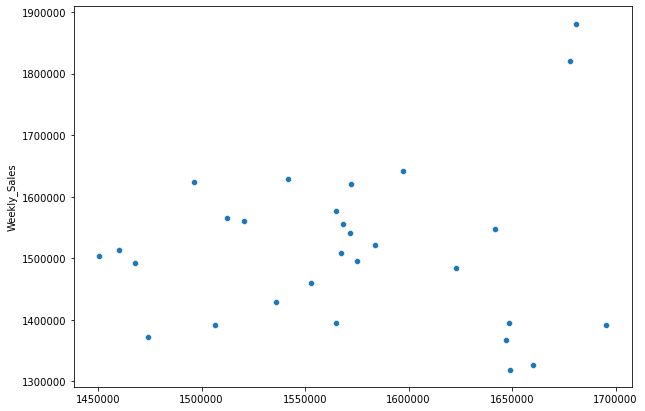

In [95]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_pred, y=y_test)
plt.ticklabel_format(style='plain')

In [85]:
# Randon forest regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rfr=RandomForestRegressor(n_estimators=1000,max_depth=15,n_jobs=5)

In [89]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=1000, n_jobs=5)

In [90]:
print('Accuracy:',rfr.score(X_train, y_train)*100)

Accuracy: 85.60295233743452


In [91]:
y_pred1=rfr.predict(X_test)

In [92]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 126318.30746831783
Mean Squared Error: 28308072532.222866
Root Mean Squared Error: 168250.02981343828


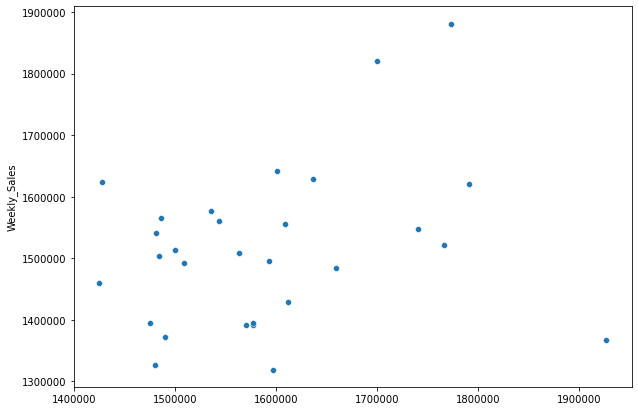

In [94]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_pred1, y=y_test)
plt.ticklabel_format(style='plain')

In [96]:
# Accuracy of random forest regressor is better than linear regression

In [98]:
#Hypothesize if CPI, unemployment, and fuel price have any impact on sales

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

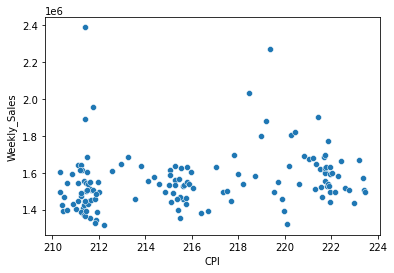

In [99]:
sns.scatterplot(x=store1_clean.CPI,y=store1_clean.Weekly_Sales)

In [102]:
# The above scatterplot shows that there is no impact of CPI on Sales

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

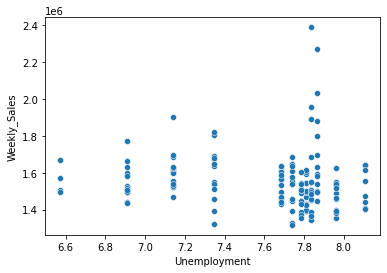

In [101]:
sns.scatterplot(x=store1_clean.Unemployment,y=store1_clean.Weekly_Sales)

In [103]:
# The above scatterplot shows that there is no impact of Unemplyment on Sales

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

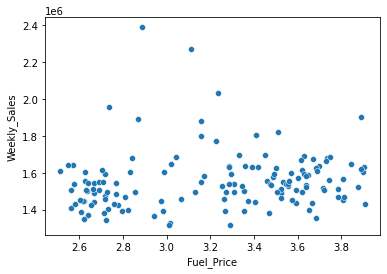

In [106]:
sns.scatterplot(x=store1_clean.Fuel_Price,y=store1_clean.Weekly_Sales)

In [107]:
# The above scatterplot shows that there is no impact of Fuel price on Sales

In [108]:
#Change dates into days by creating new variable.

In [109]:
walmart['Day'] = pd.to_datetime(walmart.Date).dt.day_name()

In [110]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Semester,Day
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2,2010,sem1,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2,2010,sem1,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2,2010,sem1,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2,2010,sem1,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,3,2010,sem1,Friday
